----
## Esercizio 7
----

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [3]:
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'figure.figsize': [8.0, 6.0],
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'font.size':20,
    'savefig.directory':'./Images'
})

In [4]:
dir = ['GAS','LIQUID','SOLID']
type = ['Gas','Liquid','Solid']
r_cut = [5.0,2.5,2.2]

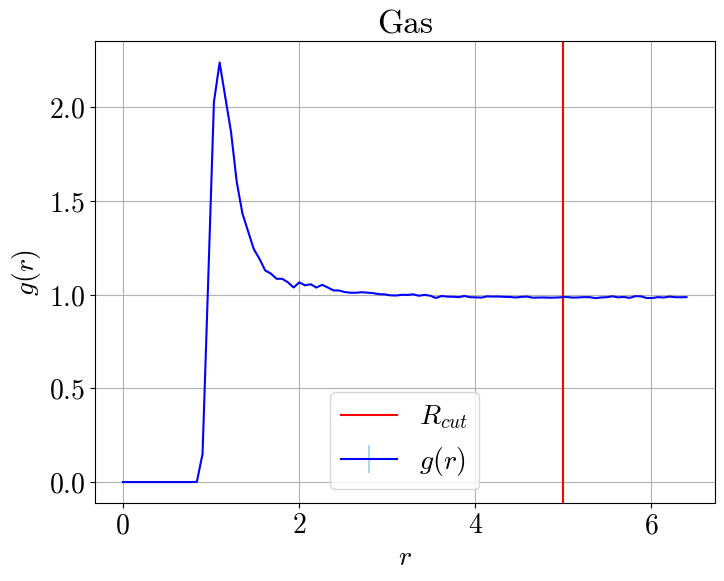

In [5]:
k=0
df_pres = pd.read_csv(dir[k]+'/gofr.dat',sep='\t')
#x = np.arange(len(df_pres))+1
#x*=1000
plt.errorbar(df_pres.iloc[:,0],df_pres.iloc[:,1],df_pres.iloc[:,2],color='blue',ecolor='lightblue',label='$g(r)$')
plt.axvline(x=r_cut[k],color='red',label='$R_{cut}$')
plt.ylabel('$g(r)$')
plt.xlabel('$r$')
#plt.ylabel('$C$')
plt.legend()
plt.title(type[k])
plt.grid(True)
plt.show()

In [4]:
#df_pres.iloc[:,]

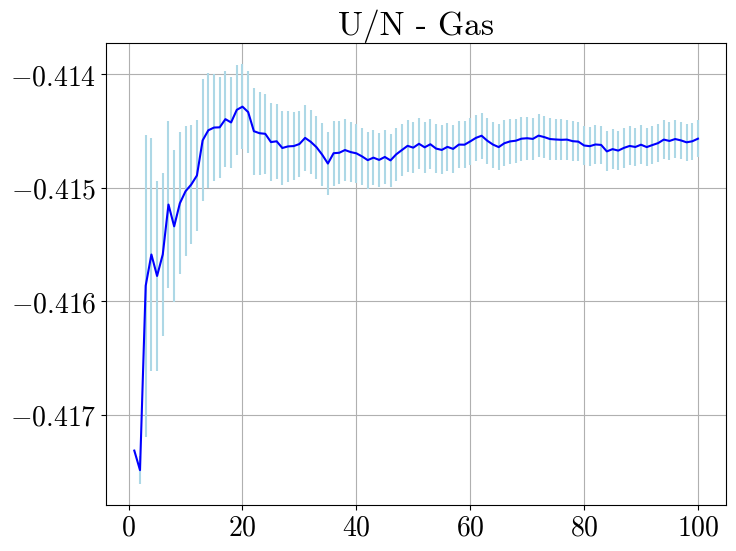

In [6]:
df_temp = pd.read_csv(dir[k]+'/potential_energy.dat',sep='\t')
#x = np.arange(len(df_pres1))+1
#x*=1000
x=df_temp.iloc[:,0]
y=df_temp.iloc[:,2]
err=df_temp.iloc[:,3]
plt.errorbar(x,y,err,color='blue',ecolor='lightblue')
plt.title('U/N - '+type[k])

#plt.xlabel('blocchi')
#plt.ylabel('$P$')
plt.grid(True)
plt.show()

$\chi(t)=\frac{\langle m(t')m(t'+t)\rangle-\langle m \rangle^2}{\sigma_m^2}$

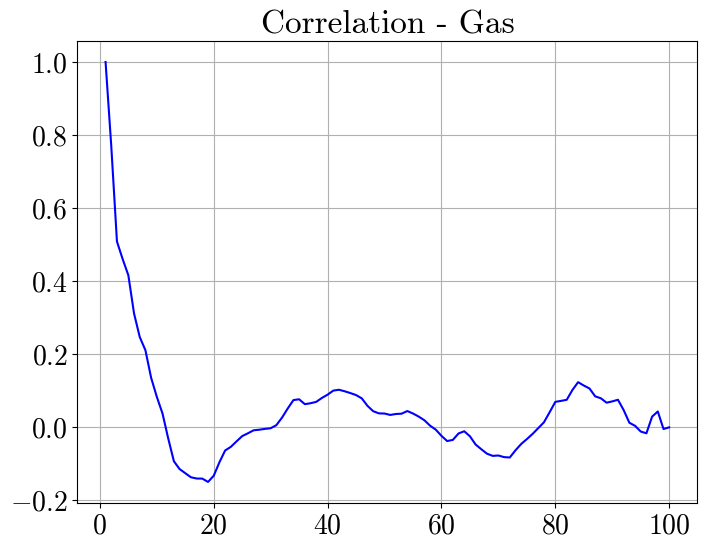

In [7]:
chi=np.zeros(len(x))
ym_q = (sum(y)/len(x))**2
yq_m = sum(y**2)/len(x)
for i in range(0,len(x)):
    mm=0
    m2=0
    m=0
    for j in range(0,len(x)-i):
        mm+=y[j]*y[j+i]/(len(x)-i)
        m2+=y[j+i]/(len(x)-i)
        m+=y[j]/(len(x)-i)
    chi[i]= (mm - m2*m)/(yq_m - ym_q)
plt.plot(x,chi,color='blue')
plt.title('Correlation - '+type[k])
plt.grid()
plt.show()

In [8]:

N=[50000,25000,20000,10000,7500,5000,4000,2500,2000,1000,750,500,400,250,200,100]#[100,250,500,1000,2500,5000,10000,25000,50000]
L=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
st=np.zeros([len(N),3])

In [9]:
for k in range(0,3):
    stat = pd.read_csv(dir[k]+'/Statistic/potential_energy.dat',sep='\t')
    x=stat.iloc[:,0]
    y=stat.iloc[:,1]
    err=stat.iloc[:,3]

    for m in range(0,len(N)):
        print(m)
        c=0.
        c2=0.
        t=0.
        t2=0.
        y_b=np.zeros(N[m])
        y2=np.zeros(N[m])
        e_b=np.zeros(N[m])
        blk= np.arange(N[m])+1
        L[m]=int(len(x)/N[m])
        for i in range(0,N[m]):
            for j in range(0,L[m]):
                c+=y[L[m]*i+j]
            c/=L[m]
            #c2/=L[m]
            t+=c
            t2+=c**2
            y_b[i]=t/(i+1)
            y2[i]=t2
            c=0.
            c2=0.
            e_b[i]=np.sqrt((y2[i]/(i+1) - y_b[i]**2)/(i+1))
        st[m,k]=e_b[-1]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


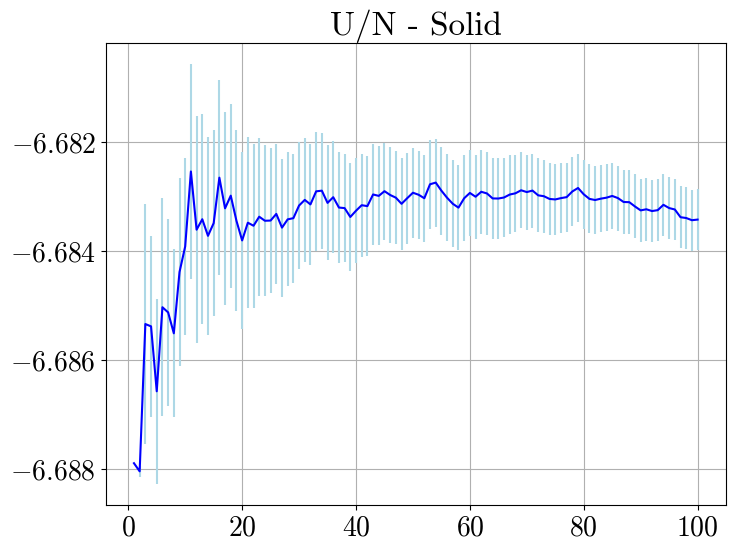

In [10]:
plt.errorbar(blk,y_b,e_b,color='blue',ecolor='lightblue')
plt.title('U/N - '+type[k])
plt.grid()
plt.show()

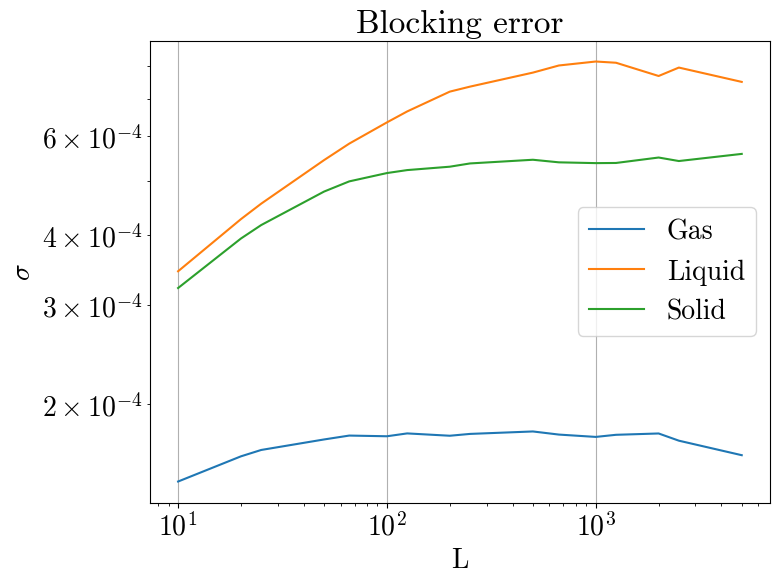

In [14]:
plt.title('Blocking error')
for k in range(0,3):
    plt.plot(L,st[:,k],label=type[k])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('L')
plt.legend()
plt.ylabel('$\sigma$')
plt.grid()
plt.show()

In [127]:
chi[19]

0.0